<a href="https://colab.research.google.com/github/KommanaboyinaPraveenKumar/lab_ml/blob/main/lab2_AP23110010460.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [24]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [25]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [27]:
# YOUR WORK: Exercise 0
print(tips['day'].unique())
print(tips['time'].unique())
print(tips.duplicated().sum())
print(tips['total_bill'].mean())
print(tips['tip'].mean())

['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']
1
19.78594262295082
2.99827868852459


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.

### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [154]:
tips["day"].value_counts()
# Here in the day column we are counting the values. So we can get how many tips are recieved on a secific day

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


## 1) Import & Core Manipulation (20m)

In [28]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [29]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [31]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [32]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [33]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [34]:
# YOUR WORK: Exercise 1
tips.query("day== 'Sat' and size >= 3").assign(bill_per_person =lambda df: df['total_bill'] / df['size']).sort_values('bill_per_person', ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,16.937
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056,0.833,14.767
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,12.082
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,12.068
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130,1.557,11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [159]:
# Filer where tip more than 6
fill = tips[tips["tip"] > 6]
print(fill.head(3))
# The new column tip_percent stores the tip percentage out of total_bill.
tips["tip_percent"] = (tips["tip"] / tips["total_bill"])*100
print(tips.head())
# Using mask
mask = (tips["day"] == "Sat") & (tips["tip"] > 5)
filtered = tips[mask]
print(filtered.head(5))
# Using .query
filtered = tips.query('day == "Sat" and tip > 5')
filtered.head()

     total_bill   tip   sex smoker   day    time  size  tip_pct  \
23        39.42  7.58  Male     No   Sat  Dinner     4    0.192   
59        48.27  6.73  Male     No   Sat  Dinner     4    0.139   
141       34.30  6.70  Male     No  Thur   Lunch     6    0.195   

     tip_per_person server_name  tip_percent  
23            1.895         Bob       19.229  
59            1.683         Bob       13.942  
141           1.117         Bob       19.534  
   total_bill   tip     sex smoker  day    time  size  tip_pct  \
0       16.99  1.01  Female     No  Sun  Dinner     2    0.059   
1       10.34  1.66    Male     No  Sun  Dinner     3    0.161   
2       21.01  3.50    Male     No  Sun  Dinner     3    0.167   
3       23.68  3.31    Male     No  Sun  Dinner     2    0.140   
4       24.59  3.61  Female     No  Sun  Dinner     4    0.147   

   tip_per_person server_name  tip_percent  
0           0.505       Alice        5.945  
1           0.553         Bob       16.054  
2          

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,server_name,tip_percent
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192,1.895,Bob,19.229
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,Bob,13.942
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,Alice,19.681
211,25.89,5.16,Male,Yes,Sat,Dinner,4,0.199,1.290,Bob,19.930
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,Alice,18.622


## 2) Cleaning & Preprocessing (15m)

In [35]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64
tip_pct,float64
tip_per_person,float64


In [36]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [60]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 10) After: (243, 10)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [162]:
# YOUR WORK: Exercise 2
print(tips['size'].dtype)
tips_clean=tips[['time','tip', 'day', 'total_bill']].copy()
print(tips.shape,tips_clean.drop_duplicates().shape)
tips_clean.head()

Int64
(244, 11) (243, 4)


,time,tip,day,total_bill
0,Dinner,1.01,Sun,16.99
1,Dinner,1.66,Sun,10.34
2,Dinner,3.50,Sun,21.01
3,Dinner,3.31,Sun,23.68
4,Dinner,3.61,Sun,24.59


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [167]:
t = tips.copy()
print("pre cast:", t['sex'].memory_usage(deep=True))
t['sex'] = t['sex'].astype('category')
print("post cast:", t['sex'].memory_usage(deep=True))
print("Duplicates in tips_clean:", tips_clean.duplicated().sum())
t = tips.copy()
before = t['day'].memory_usage(deep=True)
t['day'] = t['day'].astype('category')
after = t['day'].memory_usage(deep=True)
print("pre cast:", before)
print("post cast :", after)
print("Memory delta:", before - after)

pre cast: 608
post cast: 608
Duplicates in tips_clean: 1
pre cast: 789
post cast : 789
Memory delta: 0


## 3) Handling Missing Data (15m)

In [59]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

,0
time,0
tip,21
day,0
total_bill,0
size,243


In [40]:
dropped = tips_na.dropna(); dropped.shape

(0, 5)

In [41]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

,0
time,0
tip,0
day,0
total_bill,0
size,243


In [42]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
time,0
tip,0
day,0
total_bill,0
size,243


In [44]:
tips_interp = tips_na.sort_values('total_bill')[['tip', 'total_bill', 'size']].interpolate(); tips_interp.isna().sum()

,0
tip,0
total_bill,0
size,243


### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [92]:
# YOUR WORK: Exercise 3

tips = tips[~(tips['tip'].isna() & tips['size'].isna())].copy()
mean_size_per_day = tips.groupby('day')['size'].transform(lambda x: round(x.mean() if pd.notna(x.mean()) else 0))
tips['size'] = tips['size'].fillna(mean_size_per_day).astype('Int64')
print(tips.isna().sum())

total_bill        0
tip               0
sex               0
smoker            0
day               0
time              0
size              0
tip_pct           0
tip_per_person    0
server_name       0
dtype: int64


/tmp/ipython-input-1071032698.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_size_per_day = tips.groupby('day')['size'].transform(lambda x: round(x.mean() if pd.notna(x.mean()) else 0))


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

NaN counts before:
 tip     5
size    4
dtype: int64

NaN counts after:
 tip     0
size    0
dtype: int64

Example: index 5 tip = 3.12


/tmp/ipython-input-1412296766.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))
/tmp/ipython-input-1412296766.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips["size"] = tips.groupby("day")["size"].transform(lambda g: g.fillna(g.median()))
/tmp/ipython-input-1412296766.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips["tip

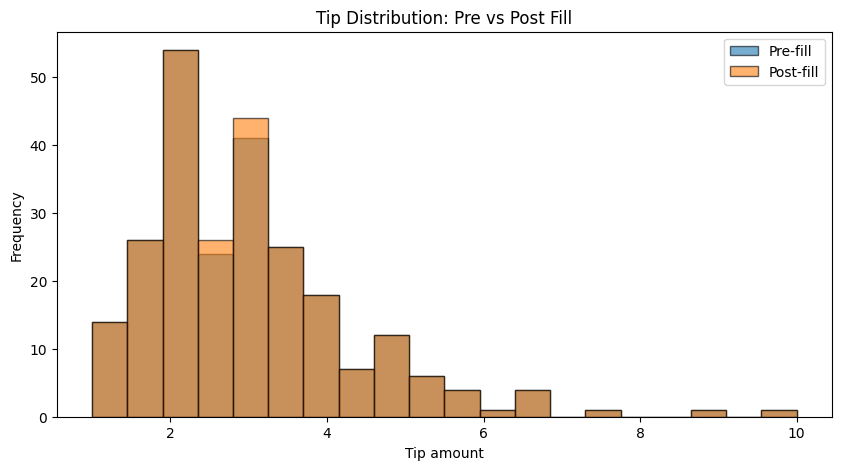

In [169]:
import pandas as pd
import numpy as np
tips.loc[5:25:5, "tip"] = np.nan
tips.loc[3:18:5, "size"] = np.nan
print("NaN counts before:\n", tips[["tip", "size"]].isna().sum())
tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))
tips["size"] = tips.groupby("day")["size"].transform(lambda g: g.fillna(g.median()))
print("\nNaN counts after:\n", tips[["tip", "size"]].isna().sum())
example_idx = 5
print(f"\nExample: index {example_idx} tip = {tips.loc[example_idx, 'tip']}")
tips.loc[5:25:5, "tip"] = np.nan
tips_pre = tips.copy()
tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))
plt.figure(figsize=(10,5))
plt.hist(tips_pre["tip"].dropna(), bins=20, alpha=0.6, label="Pre-fill", edgecolor="black")
plt.hist(tips["tip"], bins=20, alpha=0.6, label="Post-fill", edgecolor="black")
plt.title("Tip Distribution: Pre vs Post Fill")
plt.xlabel("Tip amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 4) Analysis & Visualization (20m)

In [93]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


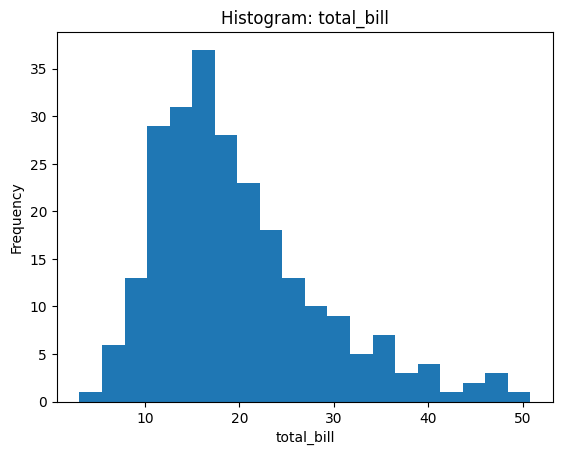

In [94]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

/tmp/ipython-input-2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


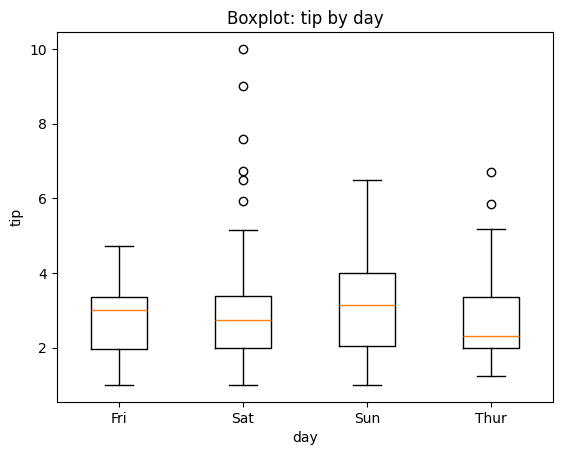

In [95]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

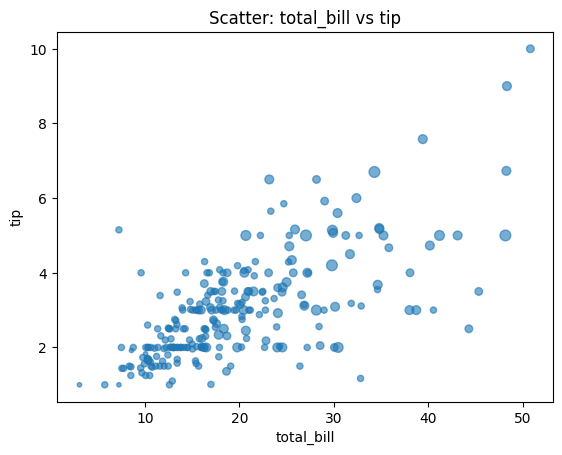

In [96]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

/tmp/ipython-input-3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


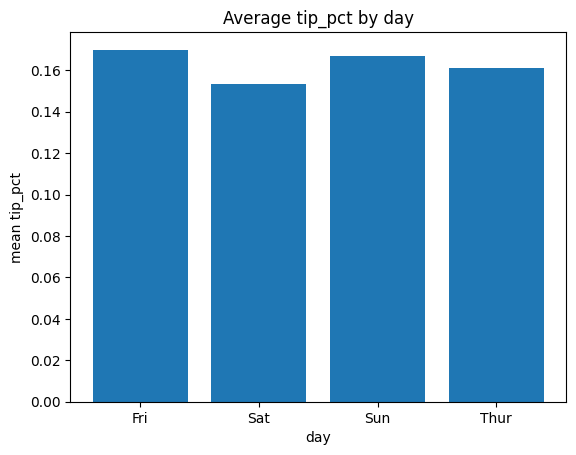

In [97]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


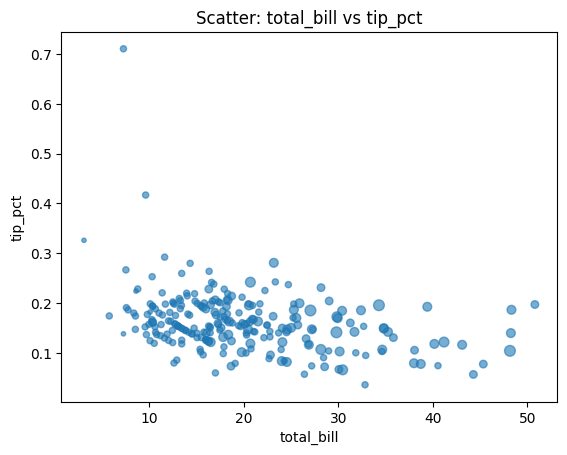

/tmp/ipython-input-3677013836.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_total_bill = tips.groupby('time')['total_bill'].median()


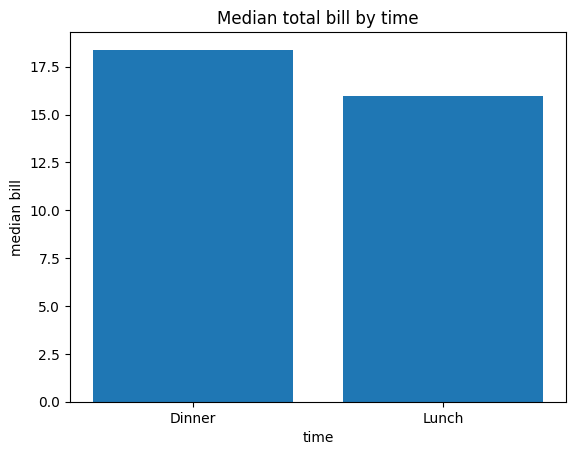

In [98]:
# YOUR WORK: Exercise 4
plt.figure(); plt.scatter(tips['total_bill'], tips['tip_pct'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip_pct'); plt.xlabel('total_bill'); plt.ylabel('tip_pct'); plt.show()
med_total_bill = tips.groupby('time')['total_bill'].median()
plt.figure(); plt.bar(med_total_bill.index.astype(str), med_total_bill.values)
plt.title('Median total bill by time'); plt.xlabel('time'); plt.ylabel('median bill'); plt.show()

### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

      count   mean    std    min    25%    50%    75%    max
size                                                        
1       4.0  0.217  0.080  0.138  0.171  0.203  0.249  0.326
2     158.0  0.166  0.066  0.036  0.136  0.157  0.195  0.710
3      37.0  0.151  0.045  0.056  0.124  0.159  0.181  0.231
4      36.0  0.145  0.043  0.077  0.117  0.144  0.173  0.281
5       5.0  0.141  0.068  0.066  0.107  0.121  0.172  0.242
6       4.0  0.156  0.042  0.104  0.132  0.163  0.187  0.195


<Figure size 640x480 with 0 Axes>

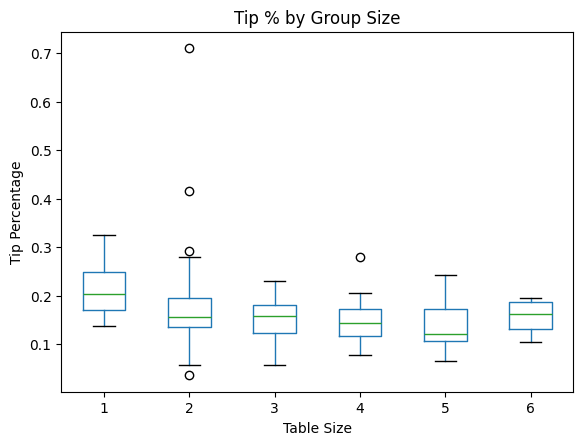

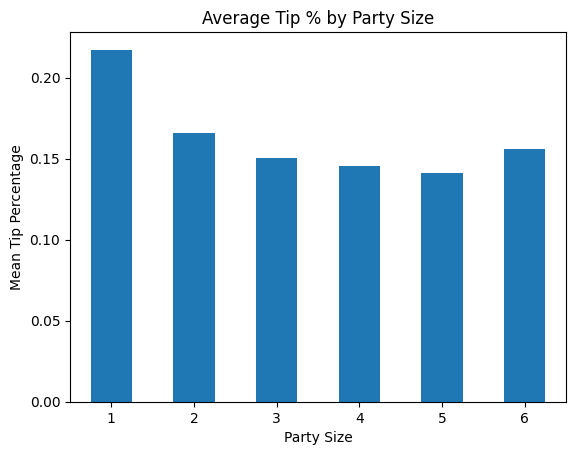

In [171]:
stats = tips.groupby("size")["tip_pct"].describe()
print(stats)
plt.figure()
tips.boxplot(column="tip_pct", by="size", grid=False)
plt.title("Tip % by Group Size")
plt.suptitle("")
plt.xlabel("Table Size")
plt.ylabel("Tip Percentage")
plt.show()
plt.figure()
tips.groupby("size")["tip_pct"].mean().plot(kind="bar", rot=0)
plt.title("Average Tip % by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Mean Tip Percentage")
plt.show()

## 5) Grouping & Merging (20m)

In [99]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

/tmp/ipython-input-754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167

In [100]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

/tmp/ipython-input-4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


,tip_pct
day,
Fri,0.211
Sat,0.115
Sun,0.197
Thur,0.161


In [101]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [102]:
# YOUR WORK: Exercise 5
s = tips.groupby(['smoker', 'sex']).agg(
    sum_bill=('total_bill', 'sum'),
    sum_tip=('tip', 'sum')
)
print(s)
time_lookup = pd.DataFrame({'time':['Lunch','Dinner'],'mapped time':['L','D']})
tips_k = tips.merge(time_lookup, on='time', how='left')
tips_k[['time','mapped time']].drop_duplicates().sort_values('time')

               sum_bill  sum_tip
smoker sex                      
No     Female    977.68   149.77
       Male     1919.75   302.00
Yes    Female    593.27    96.74
       Male     1337.07   183.07


/tmp/ipython-input-215892271.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = tips.groupby(['smoker', 'sex']).agg(


,time,mapped time
0,Dinner,D
77,Lunch,L


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [173]:
print("Index:", g.index.names)
print("Columns:", g.columns)
print("Tips row count:", len(tips))
print("Tips_merge row count:", len(tips_merge))
tips['avg_tip_pp'] = tips['tip'] / tips['size']
g = tips.groupby(['day','time']).agg(
    tip_sum=('tip','sum'),
    avg_tip_pp=('avg_tip_pp','mean')
).reset_index()
rank = g.sort_values('avg_tip_pp', ascending=False)
print(rank)

Index: ['day', 'time']
Columns: Index(['count', 'avg_bill', 'avg_tip', 'avg_tip_pct'], dtype='object')
Tips row count: 244
Tips_merge row count: 244
    day    time  tip_sum  avg_tip_pp
6  Thur  Dinner     3.00         1.5
0   Fri  Dinner    35.28       1.371
1   Fri   Lunch    16.68       1.257
4   Sun  Dinner   246.41       1.229
2   Sat  Dinner   259.48       1.206
7  Thur   Lunch   168.83       1.172
3   Sat   Lunch     0.00        <NA>
5   Sun   Lunch     0.00        <NA>


/tmp/ipython-input-1152523807.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tips.groupby(['day','time']).agg(


## 6) Reshaping & Pivoting (15m)

In [103]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

/tmp/ipython-input-3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [104]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [105]:
# YOUR WORK: Exercise 6
piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean'); piv

/tmp/ipython-input-2283347451.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean'); piv


day,Fri,Sat,Sun,Thur
size,,,,
1,8.580,5.160,NaN,10.070
2,16.322,16.837,17.560,15.157
3,15.980,25.509,22.184,19.160
4,40.170,29.876,26.688,29.950
5,NaN,28.150,27.000,41.190
6,NaN,NaN,48.170,30.383


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [174]:
piv = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
print("Pivot shape:", piv.shape)
print("Pivot index:", piv.index.name)
print("Pivot columns:", piv.columns.name)
long = piv.reset_index().melt(id_vars=['day'], var_name='size', value_name='mean_total_bill')
print("Long shape:", long.shape)
print("Long columns:", long.columns.tolist())
mean = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
median = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='median')
sum = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='sum')
print("Mean:\n", mean.head(), "\n")
print("Median:\n", median.head(), "\n")
print("Sum:\n", sum.head())

Pivot shape: (4, 6)
Pivot index: day
Pivot columns: size
Long shape: (24, 3)
Long columns: ['day', 'size', 'mean_total_bill']
Mean:
 size      1       2       3       4      5       6
day                                               
Fri    8.58  16.322  15.980  40.170    NaN     NaN
Sat    5.16  16.837  25.509  29.876  28.15     NaN
Sun     NaN  17.567  22.556  27.174  27.00  48.170
Thur  10.07  15.157  19.160  29.950  41.19  30.383 

Median:
 size      1       2       3      4      5      6
day                                             
Fri    8.58  14.400  15.980  40.17    NaN    NaN
Sat    5.16  15.530  22.355  25.89  28.15    NaN
Sun     NaN  16.820  20.955  25.56  29.85  48.17
Thur  10.07  14.205  18.675  27.20  41.19  29.80 

Sum:
 size      1       2       3       4      5      6
day                                              
Fri    8.58  261.15   15.98   40.17   0.00   0.00
Sat   10.32  892.37  459.17  388.39  28.15   0.00
Sun    0.00  720.24  315.79  461.96  81.00  48.1

/tmp/ipython-input-4258205055.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
/tmp/ipython-input-4258205055.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
/tmp/ipython-input-4258205055.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  median = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc

## 7) Mini-Project: When are tips the most generous? (5–10m)

day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


/tmp/ipython-input-157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


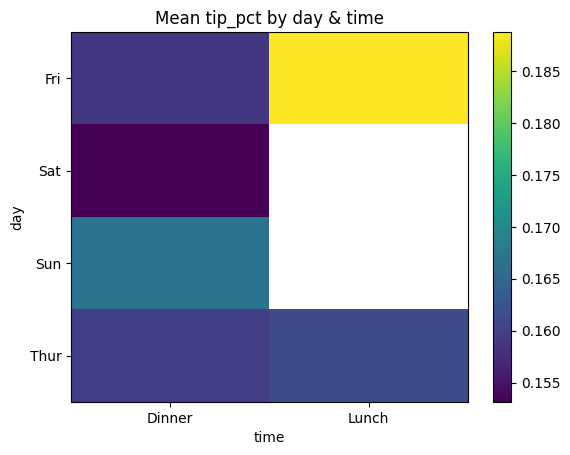

In [106]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [175]:
combo_counts = tips.groupby(['day', 'time']).size().sort_values(ascending=False)
print("Top 3 day×time combos:\n", combo_counts.head(3))
top_combo = combo_counts.index[0]
print("\nSample size for top combo {}: {}".format(top_combo, combo_counts.iloc[0]))
m = tips.groupby(['day', 'time'])['tip_pct'].median().sort_values(ascending=False)
print("Top 3 day×time combos by median tip_pct:\n", m.head(3))
t = m.index[0]
s = tips[(tips['day'] == t[0]) & (tips['time'] == t[1])].shape[0]
print(f"\nSample size for top combo {t}: {s}")

Top 3 day×time combos:
 day   time  
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
dtype: int64

Sample size for top combo ('Sat', 'Dinner'): 87
Top 3 day×time combos by median tip_pct:
 day   time  
Fri   Lunch     0.188
Sun   Dinner    0.161
Thur  Dinner    0.160
Name: tip_pct, dtype: float64

Sample size for top combo ('Fri', 'Lunch'): 7


/tmp/ipython-input-999682701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo_counts = tips.groupby(['day', 'time']).size().sort_values(ascending=False)
/tmp/ipython-input-999682701.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m = tips.groupby(['day', 'time'])['tip_pct'].median().sort_values(ascending=False)


# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [107]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3    0.162           1.117   
    Dinner       17.92  4.08    Male     No     2    0.228           2.040   
    Dinner       20.29  2.75  Female     No     2    0.136           1.375   
    Dinner       15.77  2.23  Female     No     2    0.141           1.115   
    Dinner       39.42  7.58    Male     No     4    0.192           1.895   

           server_name  
day time                
Sat Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob

In [110]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


/tmp/ipython-input-1613009599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.159
1,Fri,Lunch,0.189
2,Sat,Dinner,0.153
3,Sat,Lunch,NaN
4,Sun,Dinner,0.167


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [176]:
ti.loc[('Sun', 'Dinner')]

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sun Dinner       16.99  1.01  Female     No     2    0.059           0.505   
    Dinner       10.34  1.66    Male     No     3    0.161           0.553   
    Dinner       21.01  3.50    Male     No     3    0.167           1.167   
    Dinner       23.68  3.31    Male     No     2    0.140           1.655   
    Dinner       24.59  3.61  Female     No     4    0.147           0.902   
...                ...   ...     ...    ...   ...      ...             ...   
    Dinner       20.90  3.50  Female    Yes     3    0.167           1.167   
    Dinner       30.46  2.00    Male    Yes     5    0.066           0.400   
    Dinner       18.15  3.50  Female    Yes     3    0.193           1.167   
    Dinner       23.10  4.00    Male    Yes     3    0.173           1.333   
    Dinner       15.69  1.50    Male    Yes     2    0.096           0.750   

           server_name  
day time                
Sun Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
...                ...  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  

[76 rows x 8 columns]

## 9) Time Series & Resampling (15m)

In [111]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.152,0.152
2024-01-14,136.08,19.59,0.144,0.148
2024-01-21,118.57,23.25,0.196,0.164
2024-01-28,139.17,22.08,0.159,0.163
2024-02-04,122.78,19.97,0.163,0.165


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

            total_bill  roll14_med
date                              
2024-01-01       16.99      16.990
2024-01-02       10.34      13.665
2024-01-03       21.01      16.990
2024-01-04       23.68      19.000
2024-01-05       24.59      21.010


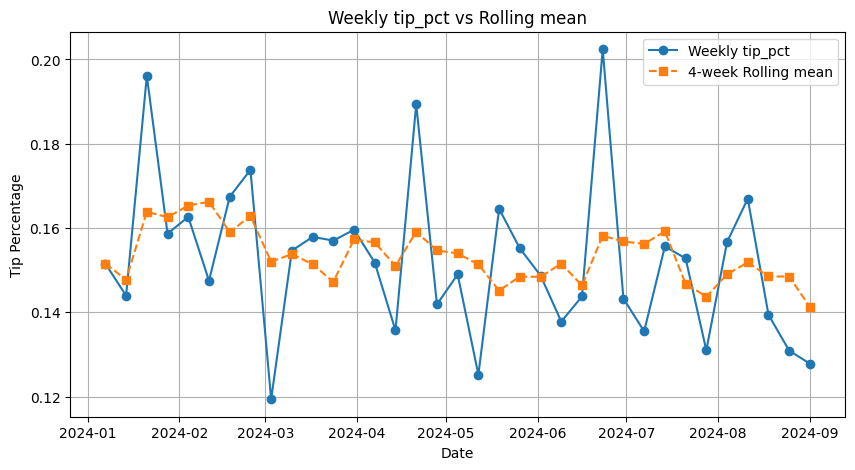

In [183]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
print(daily[['total_bill','roll14_med']].head())
weekly = tips_ts.resample('W')[['total_bill', 'tip']].sum()
weekly['tip_pct'] = weekly['tip'] / weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
plt.figure(figsize=(10,5))
plt.plot(weekly.index, weekly['tip_pct'], marker='o', label='Weekly tip_pct')
plt.plot(weekly.index, weekly['tip_pct_roll4'], marker='s', linestyle='--', label='4-week Rolling mean')
plt.title('Weekly tip_pct vs Rolling mean')
plt.xlabel('Date')
plt.ylabel('Tip Percentage')
plt.legend()
plt.grid(True)
plt.show()

## 10) Rolling & Window Ops (10m)

In [184]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

,total_bill,roll14_med
date,,
2024-01-01,16.99,16.990
2024-01-02,10.34,13.665
2024-01-03,21.01,16.990
2024-01-04,23.68,19.000
2024-01-05,24.59,21.010


### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [185]:
r = d['total_bill'].rolling(14, min_periods=1)
print(r.median().dropna().head())
print("min_periods =", r.min_periods)
d['roll14_std'] = d['total_bill'].rolling(14, min_periods=1).std()
d['roll14_min'] = d['total_bill'].rolling(14, min_periods=1).min()
d[['total_bill', 'roll14_std', 'roll14_min']].head()

day
Fri    28.970
Fri    25.730
Fri    22.490
Fri    19.405
Fri    22.490
Name: total_bill, dtype: float64
min_periods = 1


/tmp/ipython-input-1228339522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['roll14_std'] = d['total_bill'].rolling(14, min_periods=1).std()
/tmp/ipython-input-1228339522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['roll14_min'] = d['total_bill'].rolling(14, min_periods=1).min()


,total_bill,roll14_std,roll14_min
day,,,
Fri,28.97,NaN,28.97
Fri,22.49,4.582,22.49
Fri,5.75,11.982,5.75
Fri,16.32,9.879,5.75
Fri,22.75,8.776,5.75


## 11) Text Data: vectorized & regex (10m)

In [115]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = pd.Series(np.resize(notes, len(tips_txt))).astype('string')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

,note,is_vip,allergy
0,VIP table,True,<NA>
1,Late night,False,<NA>
2,Allergic: nuts,False,nuts
3,Birthday,False,<NA>
4,Family,False,<NA>


### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [186]:
c = tips_txt['is_vip'].value_counts()
print("VIP counts:\n", c)
u = tips_txt['allergy'].dropna().unique()
print("Unique allergies detected:", u)
tips_txt['is_vip_orig'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['is_vip_refined'] = tips_txt['note'].str.contains(r'\bvip\b', case=False)
print("Original VIP count:", tips_txt['is_vip_orig'].sum())
print("Refined VIP count:", tips_txt['is_vip_refined'].sum())

VIP counts:
 is_vip
False    163
True      81
Name: count, dtype: Int64
Unique allergies detected: <StringArray>
['nuts']
Length: 1, dtype: string
Original VIP count: 81
Refined VIP count: 81


## 12) Nullable dtypes & Memory (5m)

In [116]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

,0
Index,132
total_bill,1952
tip,1952
sex,476
smoker,471
...,...
tip_per_person,1952
server_name,14888
size_N,2196
sex_S,15058


### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [187]:
print("Memory usage before cast:\n", tips['day'].memory_usage(deep=True))
tips['day_cat'] = tips['day'].astype('category')
print("Memory usage after cast:\n", tips['day_cat'].memory_usage(deep=True))
print("Categories for 'day_cat':", tips['day_cat'].cat.categories)
mem_before = tips_mem.memory_usage(deep=True).sum()
print("Memory usage before downcast:", mem_before)
tips_mem['total_bill'] = pd.to_numeric(tips_mem['total_bill'], downcast='float')
tips_mem['tip'] = pd.to_numeric(tips_mem['tip'], downcast='float')
tips_mem['size_N'] = pd.to_numeric(tips_mem['size_N'], downcast='integer')
mem_after = tips_mem.memory_usage(deep=True).sum()
print("Memory usage after downcast:", mem_after)
print("Memory delta:", mem_before - mem_after)

Memory usage before cast:
 789
Memory usage after cast:
 789
Categories for 'day_cat': Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')
Memory usage before downcast: 45016
Memory usage after downcast: 41356
Memory delta: 3660


## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [117]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

,day,time,avg_bill
0,Sat,Dinner,20.65
1,Sun,Dinner,18.25


### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [188]:
print("Final columns:", tips.columns.tolist())
tips['size'] = tips['size'].astype('int64')
print("Columns after re-running step:", tips.columns.tolist())
tips['tip_pct'] = tips['tip'] / tips['total_bill']
high_tips = tips[tips['tip_pct'] > 0.2]
avg_high_tip = high_tips['tip_pct'].mean()
print(avg_high_tip)
avg_high_tip = (
    tips
    .assign(tip_pct=lambda df: df['tip'] / df['total_bill'])
    .query("tip_pct > 0.2")
    ['tip_pct']
    .mean()
)
print(avg_high_tip)

Final columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct', 'tip_per_person', 'server_name', 'tip_percent', 'avg_tip_pp', 'day_cat']
Columns after re-running step: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct', 'tip_per_person', 'server_name', 'tip_percent', 'avg_tip_pp', 'day_cat']
0.24999587272010382
0.24999587272010382


## 14) Join Patterns (10–15m)

In [118]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

/tmp/ipython-input-1235496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})


,day,time,size,avg_tip,_merge
0,Fri,Dinner,2,2.940,both
1,Fri,Dinner,4,2.940,both
2,Fri,Lunch,2,2.383,both
3,Fri,Lunch,1,2.383,both
4,Fri,Lunch,3,2.383,both


In [119]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

22

In [120]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

/tmp/ipython-input-961497798.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))


(    day  rank  score
 0   Fri   1.0    NaN
 1   Sat   2.0   80.0
 2   Sun   3.0   90.0
 3  Thur   NaN   70.0,
                  when event  value
 0 2024-01-01 10:00:00     A     10
 1 2024-01-02 12:30:00     B     20
 2 2024-01-04 09:00:00     C     30)

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [189]:
left_count = len(joined[joined['_merge'] == 'left_only'])
right_count = len(joined[joined['_merge'] == 'right_only'])
inner_count = len(joined[joined['_merge'] == 'both'])
print(f"Left-only rows: {left_count}")
print(f"Right-only rows: {right_count}")
print(f"Inner rows: {inner_count}")
anti_join_sample = joined[joined['_merge'] == 'right_only'].head(2)
print("\nSample anti-join rows (right-only):")
print(anti_join_sample)
semi_join = left.merge(right, on=['day', 'time'], how='inner')[left.columns]
print(semi_join.head())

Left-only rows: 0
Right-only rows: 2
Inner rows: 22

Sample anti-join rows (right-only):
    day   time  size  avg_tip      _merge
10  Sat  Lunch  <NA>      NaN  right_only
16  Sun  Lunch  <NA>      NaN  right_only
   day    time  size
0  Sun  Dinner     2
1  Sun  Dinner     3
2  Sun  Dinner     4
3  Sat  Dinner     3
4  Sat  Dinner     2


## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [122]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))

eval_demo = tips.assign(bill_pp = tips['total_bill'] / tips['size'])
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

/tmp/ipython-input-1780268287.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),


(      mean_bill_pp  mean_tip_pct
 day                             
 Thur          9.39         0.160
 Fri          8.995         0.159
 Sat          8.187         0.153
 Sun          7.864         0.167,
    total_bill  size  bill_pp
 0       16.99     2    8.495
 1       10.34     3    3.447
 2       21.01     3    7.003
 3       23.68     2    11.84
 4       24.59     4    6.147)

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [190]:
print("Final columns:", tips.columns.tolist())
tips_final_re = tips.copy()
tips_final_re['size'] = tips_final_re['size'].astype('int64')
print("Columns after re-run:", tips_final_re.columns.tolist())
print("Idempotent check:", tips.equals(tips_final_re))
tips_sorted = (
    tips.assign(tip_pct=lambda df: df['tip'] / df['total_bill'])
        .query('size > 1')
        .groupby(['day', 'time'], as_index=False)['tip_pct']
        .mean()
        .sort_values('tip_pct', ascending=False)
)
tips_sorted.head()

Final columns: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct', 'tip_per_person', 'server_name', 'tip_percent', 'avg_tip_pp', 'day_cat']
Columns after re-run: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct', 'tip_per_person', 'server_name', 'tip_percent', 'avg_tip_pp', 'day_cat']
Idempotent check: True


/tmp/ipython-input-1504820312.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['day', 'time'], as_index=False)['tip_pct']


,day,time,tip_pct
1,Fri,Lunch,0.183
4,Sun,Dinner,0.167
7,Thur,Lunch,0.161
6,Thur,Dinner,0.160
0,Fri,Dinner,0.159


## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [123]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

/tmp/ipython-input-2604880072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
/tmp/ipython-input-2604880072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()


(day     Fri  Sat  Sun  Thur
 smoker                     
 No        4   45   57    45
 Yes      15   42   19    17,
 bill_bucket
 (0, 10]     1.838
 (10, 20]    2.455
 (20, 30]    3.608
 (30, 50]    4.408
 Name: tip, dtype: float64,
 q
 (0.0346, 0.129]    24.933
 (0.129, 0.155]     19.051
 (0.155, 0.191]     17.848
 (0.191, 0.71]      17.312
 Name: total_bill, dtype: float64)

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [191]:
bill_cuts = pd.cut(tips['total_bill'], bins=[0, 10, 20, 30, 50])
print("Cut bucket edges:", bill_cuts.cat.categories)
print("Counts per cut bucket:\n", bill_cuts.value_counts())
tip_pct_qcuts = pd.qcut(tips['tip_pct'], 4, duplicates='drop')
print("\nQCut bucket edges:", tip_pct_qcuts.cat.categories)
print("Counts per qcut bucket:\n", tip_pct_qcuts.value_counts())
bucket_means = tips.groupby(bill_cuts)['tip'].mean()
print("\nBucket means:\n", bucket_means)
print("Monotonic increasing?", bucket_means.is_monotonic_increasing)
Q1, Q3 = tips['tip'].quantile([0.25, 0.75])
IQR = Q3 - Q1
mask = (tips['tip'] >= Q1 - 1.5*IQR) & (tips['tip'] <= Q3 + 1.5*IQR)
tips_no_outliers = tips.loc[mask]
bill_cuts_no_outliers = pd.cut(tips_no_outliers['total_bill'], bins=[0, 10, 20, 30, 50])
bucket_means_no_outliers = tips_no_outliers.groupby(bill_cuts_no_outliers)['tip'].mean()
print("Bucket means after masking outliers:\n", bucket_means_no_outliers)

Cut bucket edges: IntervalIndex([(0, 10], (10, 20], (20, 30], (30, 50]], dtype='interval[int64, right]')
Counts per cut bucket:
 total_bill
(10, 20]    130
(20, 30]     65
(30, 50]     31
(0, 10]      17
Name: count, dtype: int64

QCut bucket edges: IntervalIndex([(0.0346, 0.128], (0.128, 0.154], (0.154, 0.191], (0.191, 0.71]], dtype='interval[float64, right]')
Counts per qcut bucket:
 tip_pct
(0.128, 0.154]     62
(0.0346, 0.128]    61
(0.191, 0.71]      61
(0.154, 0.191]     60
Name: count, dtype: int64

Bucket means:
 total_bill
(0, 10]     1.838
(10, 20]    2.459
(20, 30]    3.571
(30, 50]    4.408
Name: tip, dtype: float64
Monotonic increasing? True
Bucket means after masking outliers:
 total_bill
(0, 10]     1.838
(10, 20]    2.459
(20, 30]    3.399
(30, 50]    3.871
Name: tip, dtype: float64


/tmp/ipython-input-2933048792.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_means = tips.groupby(bill_cuts)['tip'].mean()
/tmp/ipython-input-2933048792.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_means_no_outliers = tips_no_outliers.groupby(bill_cuts_no_outliers)['tip'].mean()


## 17) Styling & Export (5m)

In [124]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

/tmp/ipython-input-1253526996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [192]:
import webbrowser
webbrowser.open('tips_report.html')
tips.groupby('day')[['total_bill', 'tip', 'tip_pct']].mean().round(2)
sty = (tips.groupby('day')[['total_bill', 'tip', 'tip_pct']]
       .mean()
       .round(2)
       .style.format({'tip_pct': '{:.2%}'})
       .background_gradient(axis=None))
html_file = 'tips_report.html'
sty.to_html(html_file, encoding='utf-8')
print(f'Styled HTML saved to {html_file}')
csv_file = 'tips_report.csv'
tips.groupby('day')[['total_bill', 'tip', 'tip_pct']].mean().round(2).to_csv(csv_file)
print(f'Raw CSV saved to {csv_file}')

Styled HTML saved to tips_report.html
Raw CSV saved to tips_report.csv


/tmp/ipython-input-3346350035.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')[['total_bill', 'tip', 'tip_pct']].mean().round(2)
/tmp/ipython-input-3346350035.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill', 'tip', 'tip_pct']]
/tmp/ipython-input-3346350035.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')[['total_bill', 'tip', 'tip

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [125]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [126]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [127]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [128]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

/tmp/ipython-input-587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Unknown,Southampton,no,False,2,3.625,YoungAdult
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,2,35.642,MidAge
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.925,YoungAdult
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2,26.550,YoungAdult
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Unknown,Southampton,no,True,1,8.050,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [196]:
# YOUR WORK: Exercise A
print(df[['age','embark_town']].isna().sum())
df['age']=df.groupby('pclass')['age'].transform(lambda x: x.fillna(x.median()))
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['family_size'].value_counts().head()
pct = (df['fare_pp'] > 20).mean() * 100
print(f"{pct:.2f}%")


age            0
embark_town    0
dtype: int64
25.36%


/tmp/ipython-input-2187054742.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


## B) Survival Patterns

In [138]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

Overall survival rate: 0.384


/tmp/ipython-input-3625588530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])


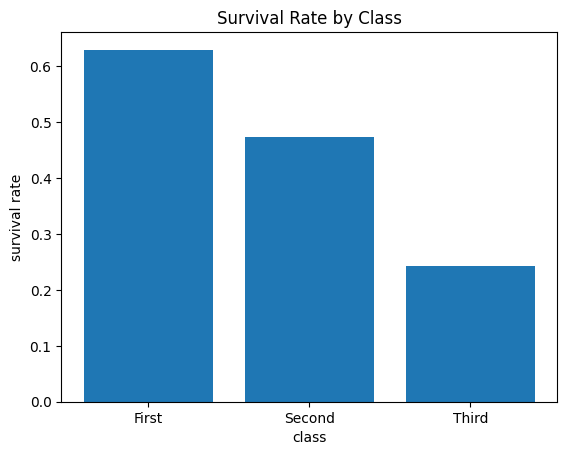

In [139]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

/tmp/ipython-input-271380004.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')


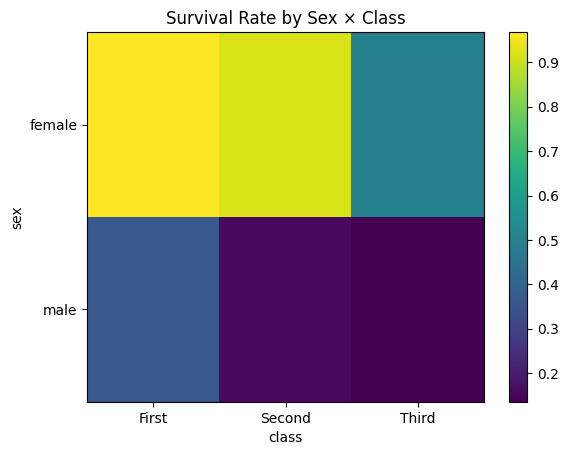

class,First,Second,Third
sex,,,
female,0.968,0.921,0.500
male,0.369,0.157,0.135


In [140]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


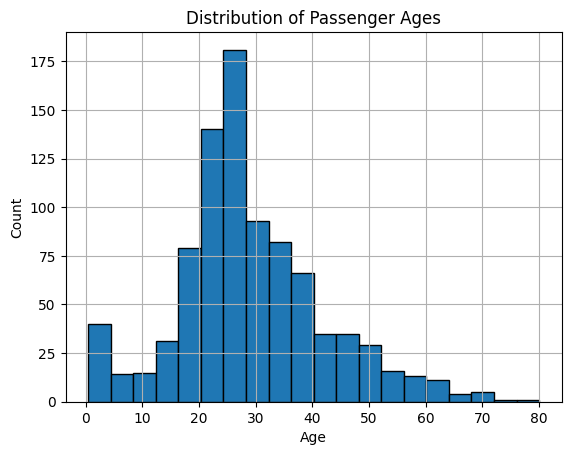

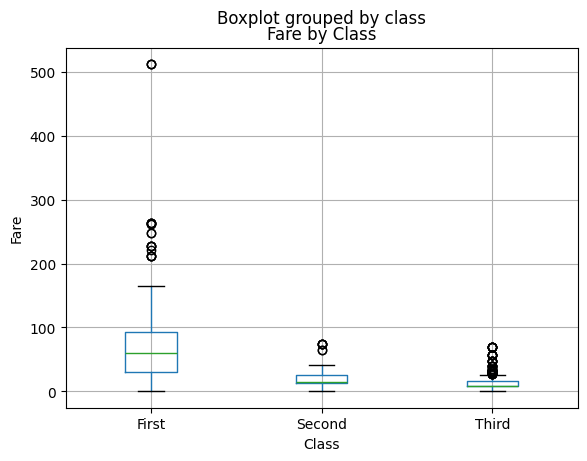

/tmp/ipython-input-1531399369.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_ageg = df.groupby('age_group')['survived'].mean().reindex(


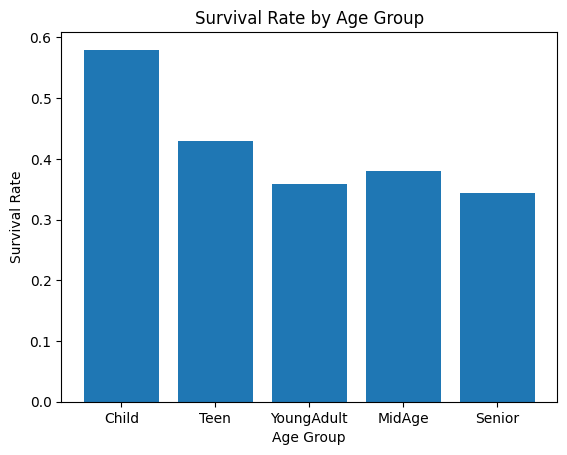

In [198]:
# YOUR WORK: Exercise B
df['age'].hist(bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Passenger Ages")
plt.show()
df[['fare', 'class']].boxplot(by='class', column='fare')
plt.title("Fare by Class")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()
surv_by_ageg = df.groupby('age_group')['survived'].mean().reindex(
    ['Child','Teen','YoungAdult','MidAge','Senior']
)

plt.figure()
plt.bar(surv_by_ageg.index, surv_by_ageg.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

## C) Subgroup Discovery

In [149]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

/tmp/ipython-input-1601229680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = (df.groupby(['sex','class','embark_town'])


n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43      0.977
              Southampton   50      0.960
       Second Southampton   67      0.910
       Third  Queenstown    33      0.727
male   First  Cherbourg     42      0.405
female Third  Southampton   88      0.375
male   First  Southampton   79      0.354
       Third  Cherbourg     43      0.233
       Second Southampton   97      0.155
       Third  Southampton  265      0.128

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [152]:
# YOUR WORK: Exercise C
g4=df.query("family_size>=4").groupby(['sex','class']).agg(n=('survived','size'), surv_rate=('survived','mean'))
g4.head(10)
df['fare_bucket'] = pd.cut(df['fare_pp'],
                           bins=[0,10,20,50,100,600],
                           labels=['0-10','10-20','20-50','50-100','100+'])
survival_fare = df.groupby('fare_bucket').agg(
    n=('survived','count'),
    survival_rate=('survived','mean')
).reset_index()

print(survival_fare)

  fare_bucket    n  survival_rate
0        0-10  497          0.278
1       10-20  153          0.431
2       20-50  160          0.556
3      50-100   44          0.682
4        100+   22          0.818


/tmp/ipython-input-2528188847.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g4=df.query("family_size>=4").groupby(['sex','class']).agg(n=('survived','size'), surv_rate=('survived','mean'))
/tmp/ipython-input-2528188847.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_fare = df.groupby('fare_bucket').agg(


## D) Deliverables

In [153]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [200]:
large_families = (df[df['family_size'] >= 4]
                  .groupby(['sex', 'class'])
                  .agg(n=('survived', 'size'),
                       surv_rate=('survived', 'mean'))
                  .sort_values('surv_rate', ascending=False))
large_families.head(10)
large_families.to_csv('large_families.csv')
survival_fare.to_csv('survival_fare.csv')
df.to_html('titanic_cleaned.html')
df['is_child'] = df['age'] <= 12
large_families_child = (df[df['family_size'] >= 4]
                        .groupby(['sex', 'class', 'is_child'])
                        .agg(n=('survived','size'),
                             surv_rate=('survived','mean'))
                        .sort_values('surv_rate', ascending=False))
print("Survival ranking including 'is_child':\n", large_families_child.head(10))

/tmp/ipython-input-3508613021.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['sex', 'class'])


Survival ranking including 'is_child':
                          n  surv_rate
sex    class  is_child               
female Second True       3      1.000
              False      8      1.000
male   Second True       1      1.000
       First  True       2      1.000
female First  False      7      0.857
male   First  False      3      0.333
female Third  True      13      0.308
              False     20      0.200
male   Third  True      17      0.118
female First  True       1      0.000


/tmp/ipython-input-3508613021.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['sex', 'class', 'is_child'])
